# DIP LAB-03

# Processing Tiff Images For Machine Learning Techniques

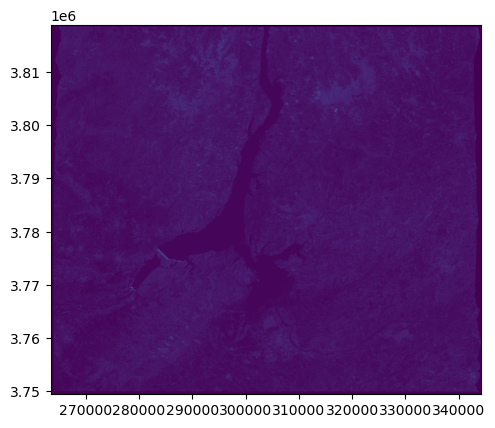

In [1]:
from rasterio.plot import show
import geos
import rasterio
import geotiff
import tifffile
import matplotlib.pyplot as plt #For plotting our visualizations
from keras.preprocessing.image import ImageDataGenerator #Keras dataset generator class.
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import cv2
from PIL import Image

%matplotlib inline
image = rasterio.open("C:\\Users\\hp\\DIP\\Task-1\\HV-ALPSRP092870670-H2.2_UA.tif")
show(image)
plt.show()


# ROTATION-->HORIZONTAL-SHIFT-->VERTICAL-SHIFT:

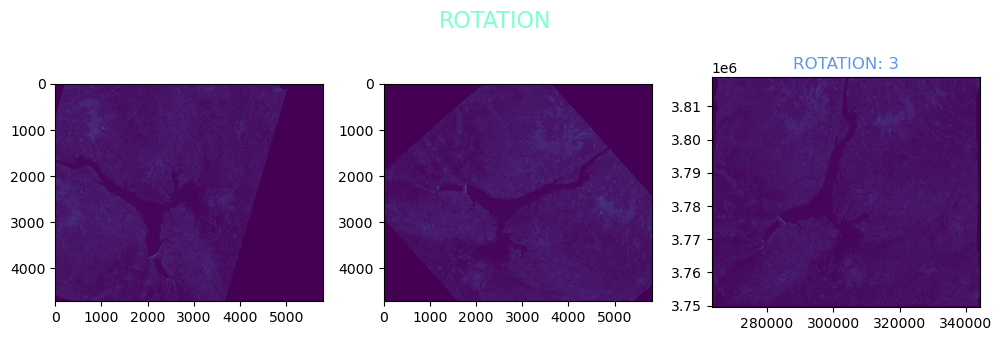

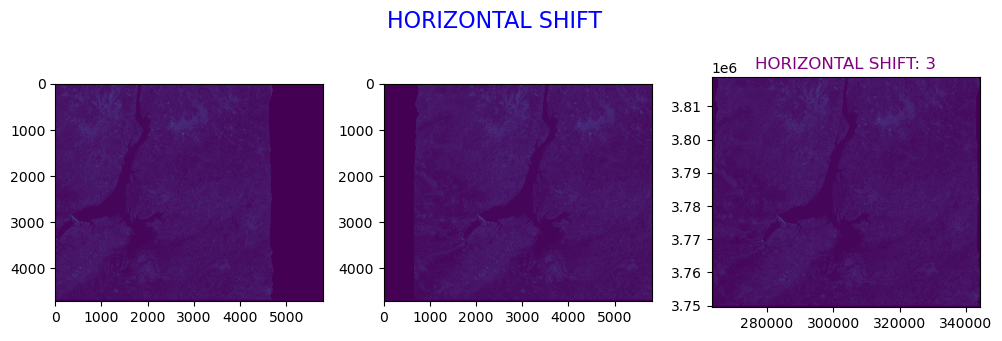

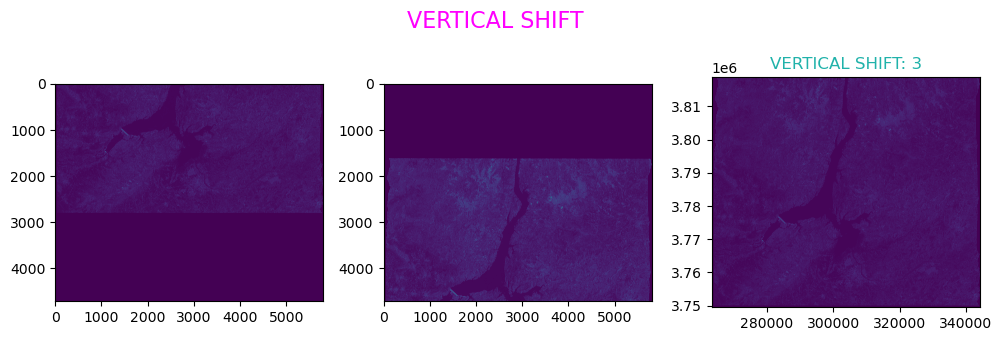

In [23]:

#Rotation
# data = img_to_array(image)
# samples = expand_dims(data, 0)
# data_generated = ImageDataGenerator(rotation_range=90)  #Here we specify angle of rotation as 90
# it = data_generated.flow(samples, batch_size=1)

# for i in range(9):
#     plt.subplot(330 + 1 + i)
#     batch = it.next()
#     result = batch[0].astype('uint8')
#     plt.imshow(result)
# show(image)

from rasterio.plot import show
import rasterio
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
from keras.preprocessing.image import img_to_array

# Open the raster file using rasterio
image_path = "C:\\Users\\hp\\DIP\\Task-1\\HV-ALPSRP092870670-H2.2_UA.tif"
image = rasterio.open(image_path)

# Read the image data and convert it to a NumPy array
data = image.read()
data = data.transpose(1, 2, 0)  # Transpose to (height, width, channels)

# Rotation
samples = expand_dims(data, 0)
data_generator = ImageDataGenerator(rotation_range=100)
it = data_generator.flow(samples, batch_size=1)

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint32')
    plt.imshow(result)
plt.suptitle("ROTATION", fontsize=16, color='aquamarine', ha='center')
plt.title("ROTATION: {}".format(i + 1), color='cornflowerblue')
#plt.title("ROTATION:",color = 'r')
plt.tight_layout()
show(image)

# Data augmentation
samples = expand_dims(data, 0)
data_generator = ImageDataGenerator(height_shift_range=0.5)
it = data_generator.flow(samples, batch_size=1)

# Display augmented images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint16')
    plt.imshow(result)
plt.suptitle("HORIZONTAL SHIFT", fontsize=16, color='blue', ha='center')
plt.title("HORIZONTAL SHIFT: {}".format(i + 1), color='purple')
plt.tight_layout()
show(image)
plt.show()

# Data augmentation
samples = expand_dims(data, 0)
data_generator = ImageDataGenerator(width_shift_range=0.5)
it = data_generator.flow(samples, batch_size=1)

# Display augmented images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint16')
    plt.imshow(result)
plt.suptitle("VERTICAL SHIFT", fontsize=16, color='magenta', ha='center')
plt.title("VERTICAL SHIFT: {}".format(i + 1), color='lightseagreen')
plt.tight_layout()
show(image)
plt.show()
#https://matplotlib.org/stable/gallery/color/named_colors.html ~~~ for font-colors.

# Enhancing Color/Color Space

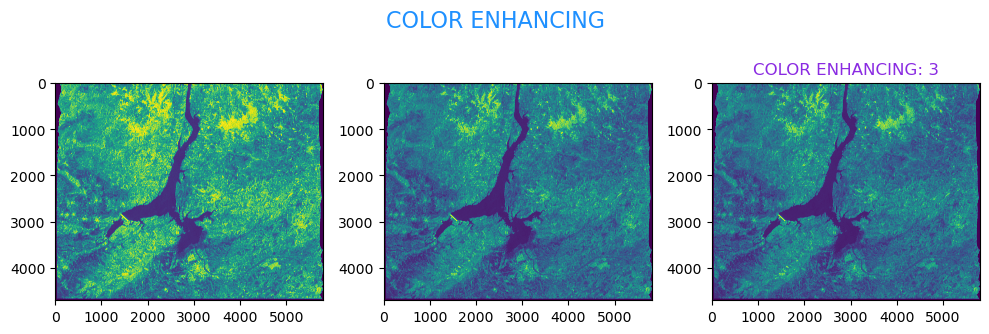

In [18]:
# Data augmentation
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(brightness_range=[0,15])
it = datagen.flow(samples, batch_size=1)

# Display augmented images
plt.figure(figsize=(10, 10))
for i in range(3):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint32')
    plt.imshow(result)
plt.suptitle("COLOR ENHANCING", fontsize=16, color='dodgerblue', ha='center')
plt.gca().set_title("COLOR ENHANCING: {}".format(i + 1), color='blueviolet', ha='center')
plt.tight_layout()
plt.show()

# IMAGE ZOOM-IN:

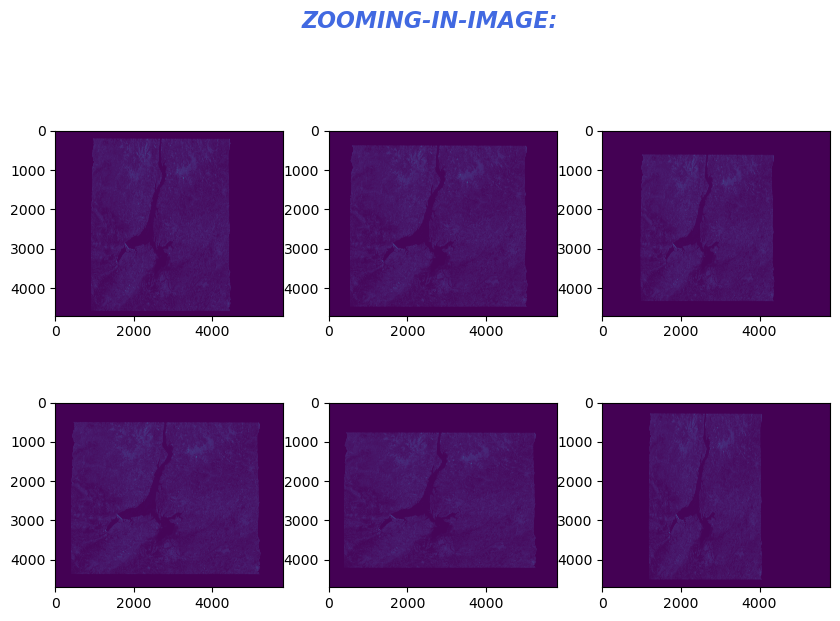

In [35]:
import seaborn as sns

# Read the image data and convert it to a NumPy array
data = image.read()
data = data.transpose(1, 2, 0)  # Transpose to (height, width, channels)

# Data augmentation
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(zoom_range=[1.0,2.0])
it = datagen.flow(samples, batch_size=1)

# Display augmented images
plt.figure(figsize=(10, 10))
for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint16')
    plt.imshow(result)
sns.set_palette("deep")
plt.suptitle("ZOOMING-IN-IMAGE:", fontsize=16,  color='royalblue', ha='center',fontstyle='italic',fontweight='bold')
plt.show()

# FLIPPING:

### HORIZONTAL FLIPPING

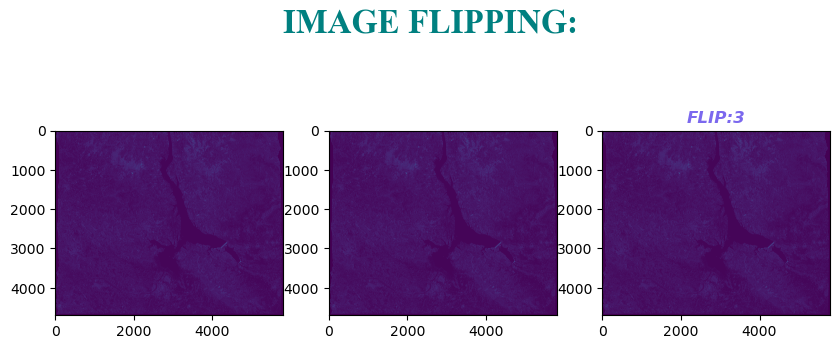

In [14]:
# Data augmentation
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True)
it = datagen.flow(samples, batch_size=1)

# Display augmented images
plt.figure(figsize=(10, 10))
title_font = {'family': 'Times New Roman'}
for i in range(3):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint16')
    plt.imshow(result)

plt.suptitle("IMAGE FLIPPING:",fontdict=title_font ,ha='center', fontsize=24, color='teal', fontweight='bold')#

plt.gca().set_title("FLIP:{}".format(i + 1), color='mediumslateblue', ha='center',fontstyle='oblique',fontweight='bold')
plt.show()

### HORIZONTAL-VERTICAL FLIPPING

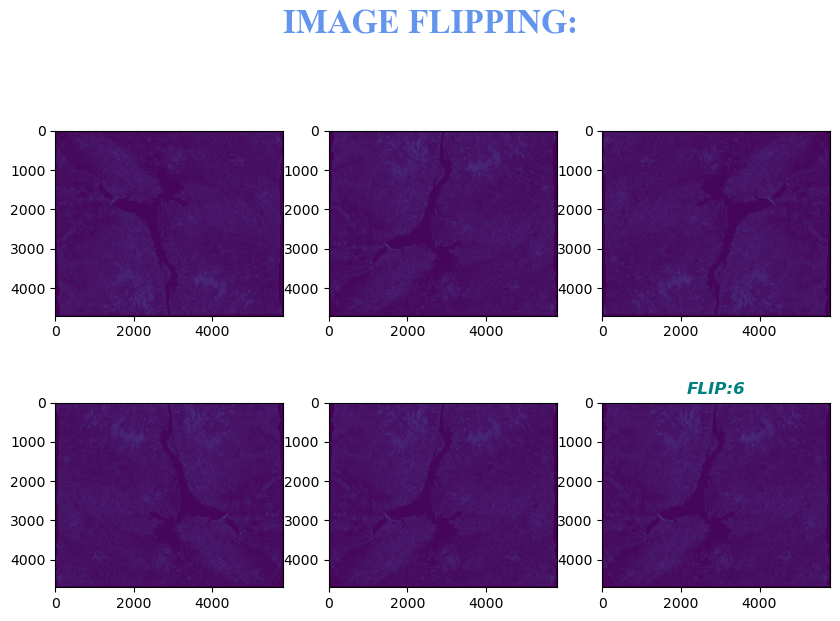

In [22]:
# Data augmentation
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True , vertical_flip=True)
it = datagen.flow(samples, batch_size=1)

# Display augmented images
plt.figure(figsize=(10, 10))
title_font = {'family': 'Times New Roman'}
for i in range(6):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    result = batch[0].astype('uint16')
    plt.imshow(result)

plt.suptitle("IMAGE FLIPPING:",fontdict=title_font ,ha='center', fontsize=24, color='cornflowerblue', fontweight='bold')#

plt.gca().set_title("FLIP:{}".format(i + 1), color='teal', ha='center',fontstyle='italic',fontweight='bold')
plt.show()